# Single-Objective Genetic Optimization Test

Using the DEAP (Distributed Evolutionary Algorithm in Python) package we will attempt to solve various single objective, multi-dimensional optimization problems.

The goal is to learn to set up simple problems using DEAP before trying to interface DEAP to Warp simulation output/input.

In [1]:
%matplotlib notebook

In [2]:
from deap import base, creator, tools, algorithms

import random
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation
import matplotlib.colors as colors

## Beale's Function

A 2D optimization problem:

$f(x,y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2$

with minimum of:

$f(3, 0.5) = 0$

In [3]:
def beale(x, y):
    f = (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2
    
    return f

<IPython.core.display.Javascript object>


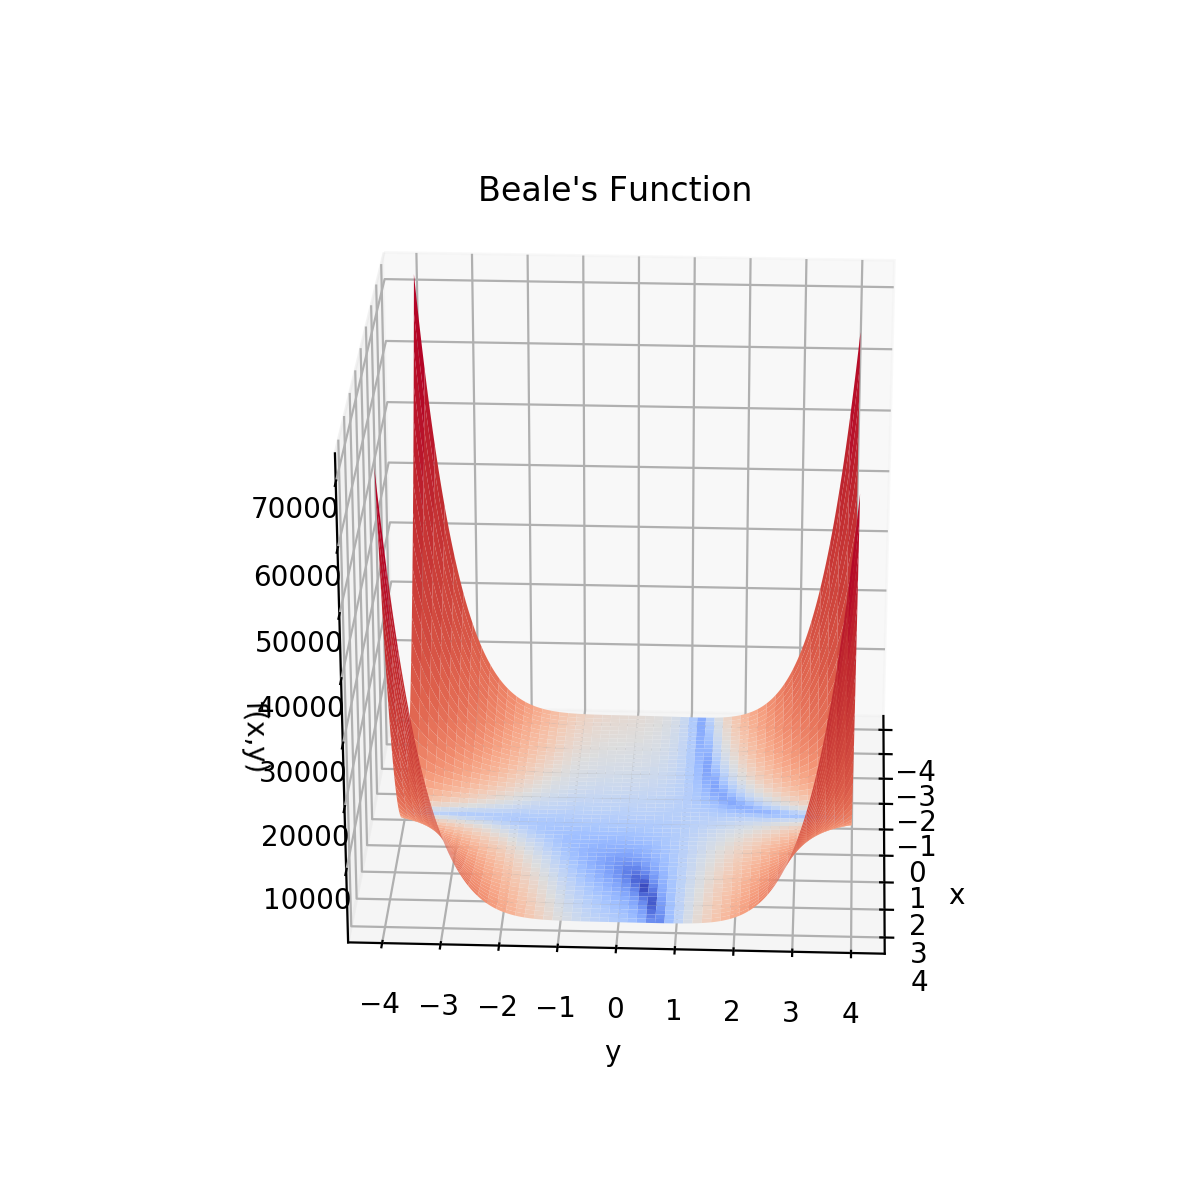

In [4]:
fig1 = plt.figure(figsize=(6, 6))
ax = fig1.gca(projection='3d')

X = np.arange(-4., 4., 0.01)
Y = np.arange(-4., 4., 0.01)

X, Y = np.meshgrid(X, Y)
Z = beale(X, Y)

ax.plot_surface(X,Y,Z, cmap=cm.coolwarm, norm=colors.LogNorm())
ax.view_init(25, 2.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Beale\'s Function' )
plt.show()

## Rastrigin Function

A 2D optimization problem:

In n-dimensions:
$f(x,y) = A n + \sum_{i=1}^n{x_i^2 - Acos(2\pi x_i)}$

On x $\in$ [-5.12, 5.12]

Where $A=10$

Minimum at: $f(0,...) = 0$

In [5]:
def rastrigin(x, y, A=10., n=2):
    f = A * n + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))
    
    return f

<IPython.core.display.Javascript object>


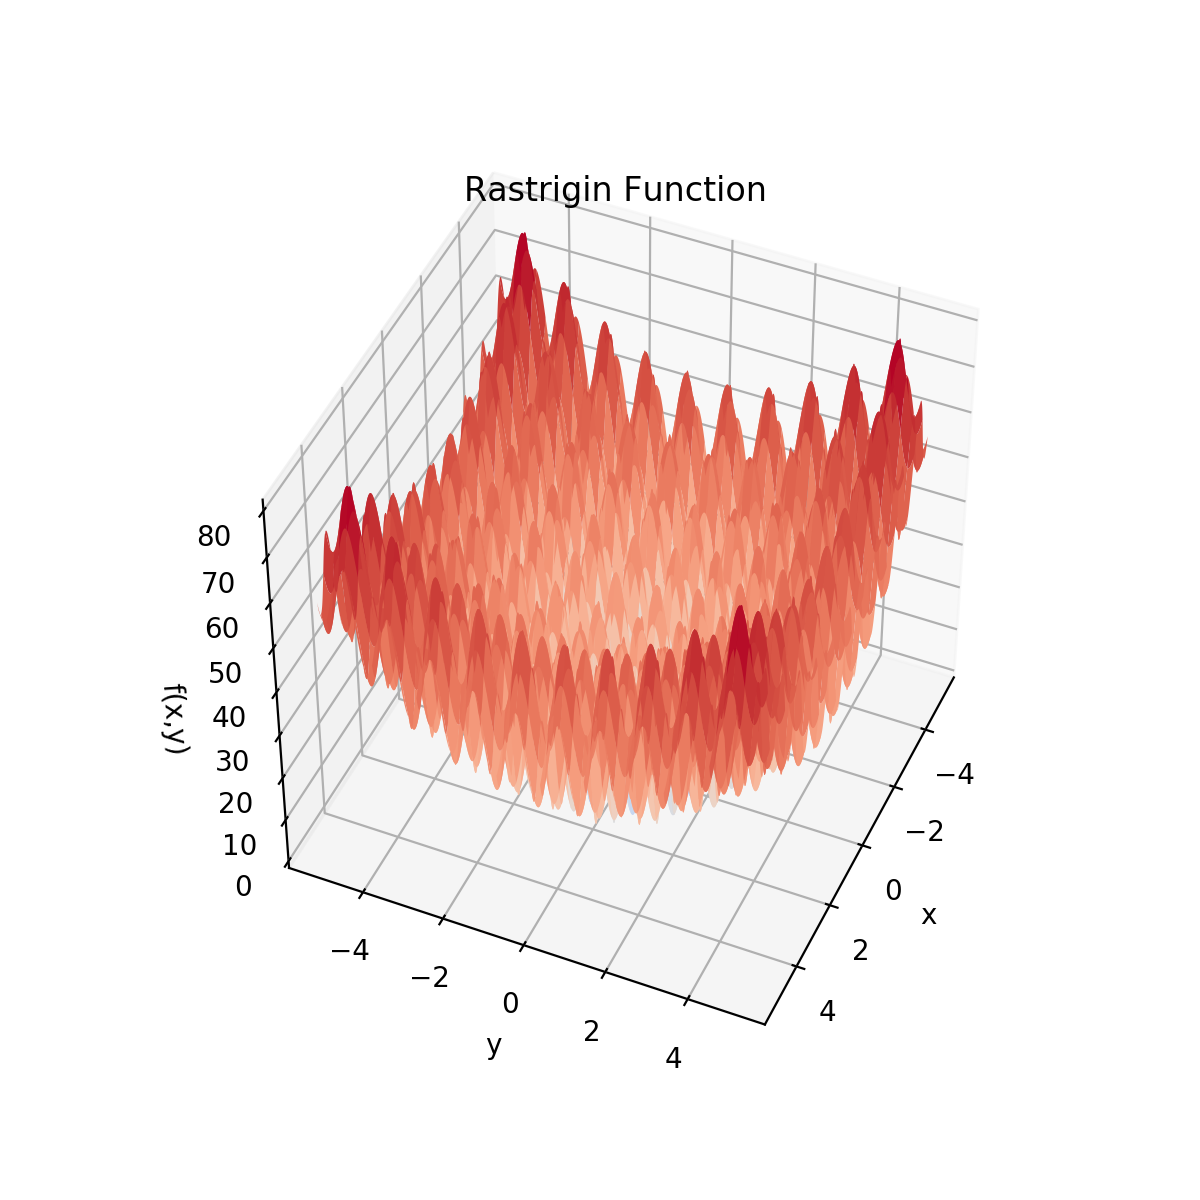

In [6]:
fig1 = plt.figure(figsize=(6, 6))
ax = fig1.gca(projection='3d')

X = np.arange(-5.12, 5.12, 0.01)
Y = np.arange(-5.12, 5.12, 0.01)

X, Y = np.meshgrid(X, Y)
Z = rastrigin(X, Y)

ax.plot_surface(X,Y,Z, cmap=cm.coolwarm, norm=colors.LogNorm())
ax.view_init(45, 23.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Rastrigin Function' )
plt.show()

### DEAP Setup


In [7]:
# Choose either 'beale' or 'rastrigin functions
opt_func = 'beale'

The `creator` class provides a way to create generic, flexible tools for optimization setup.
Here we define that we are optimizing a single value to find a minimum and declare a template for an Individual that will be datatype `list`.

In [8]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [9]:
toolbox = base.Toolbox()

Define a custom function that will be used for random generation of new population members.

In [10]:
def random_float(mini, maxi, center):
    rand = (random.random() - 0.5) * (maxi - mini) + center
    
    return rand

toolbox.register("attr_float", random_float, -4., 4., 0.)

Define how an `individual` is created (note, `Individual` gives properties for the `individual`).

- `individual`: Name of individuals
- `tools.initRepeat`: Operation for filling `individual` container
- `creator.Individual`: Properties of `individual`
- `toolbox.attr_float`: Function called when filling container
- `n`: Number of slots in container

In [11]:
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)

Definition for the `population` of `individuals`.

- `population`: Name of the population class
- `tools.initRepeat`: Operation for populating the `population`
- `list`: Data type holding population
- `toobox.individual`: Class holding an `individual` for the `population`

In [12]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Define the function for evaluating an individual's fitness.

Define the operation for mating two individuals.

Define a mutation algorithm.

Define a selection routine for choosing among the fittest individuals.

In [13]:
def evalFitnessBeale(individual):
    x, y = individual
    return (beale(x, y),)

def evalFitnessRastrigin(individual):
    x, y = individual
    return (rastrigin(x, y),)

if opt_func == 'rastrigin':
    toolbox.register("evaluate", evalFitnessRastrigin)
elif opt_func == 'beale':
    toolbox.register("evaluate", evalFitnessBeale)
else:
    print "Function options are: rastrigin or beale"
    
toolbox.register("mate", tools.cxTwoPoint)

mu = 0.
sigma = 0.5
indpb = 0.33
toolbox.register("mutate", tools.mutGaussian, mu=mu, sigma=sigma, indpb=indpb)

toolbox.register("select", tools.selTournament, tournsize=3)

The control function.
This uses the pre-defined algorithm `eaSimple`.
Statistics for the run may be passed out of the algorithm during runtime using `tools.statistics` to define the class `stat`.
Here we pass out each generation of the population for full post-processing after the algorithm completes. 

In [14]:
def main():
    
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    
#     stats = tools.Statistics(lambda ind: ind.fitness.values)
#     stats.register("avg", np.mean)
#     stats.register("min", np.min)
#     stats.register("max", np.max)   
    stats = tools.Statistics(lambda ind: ind)
    stats.register("avg", np.array)
    if opt_func == 'rastrigin':
        gen_n = 200
    elif opt_func == 'beale':
        gen_n = 15
    else:
        print "Function options are: rastrigin or beale"
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=gen_n, stats=stats, halloffame=hof, verbose=False)
    
    return pop, logbook, hof

In [15]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

Best individual is: [2.992591317782405, 0.4986104918699329]
with fitness: (1.3551716404767709e-05,)


### Post-Processing

<IPython.core.display.Javascript object>


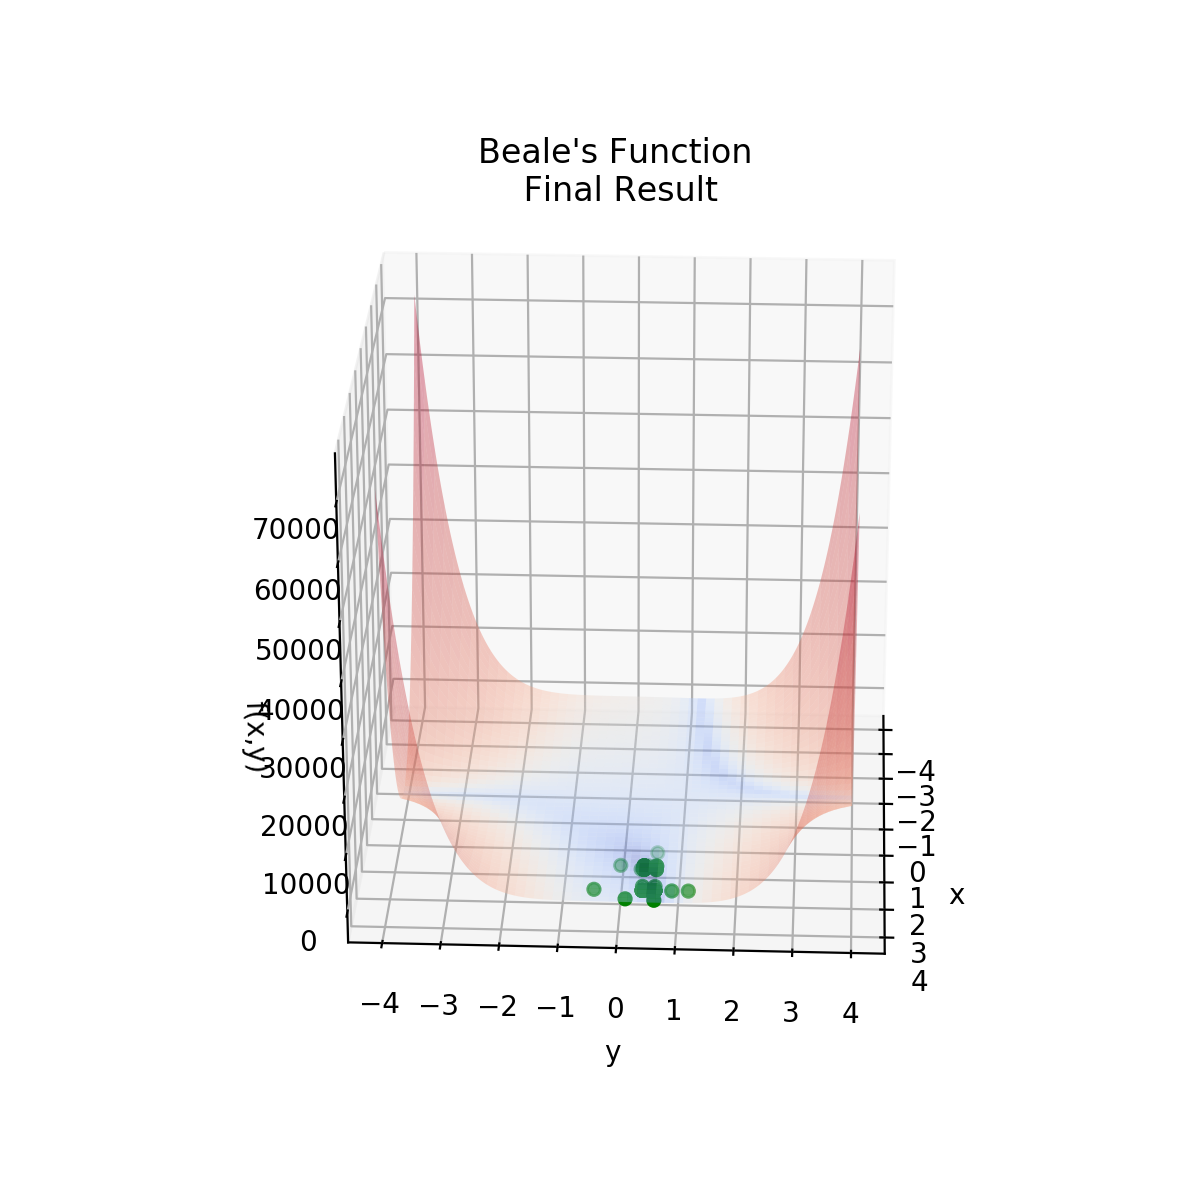

In [16]:
# Visualizing the last generation on a contour plot of Beale's function.

fig1 = plt.figure(figsize=(6, 6))
ax = fig1.gca(projection='3d')

if opt_func == 'rastrigin':
    func_name = 'Rastrigin'
    X = np.arange(-1.5, 1.5, 0.001)
    Y = np.arange(-1.5, 1.5, 0.001)
    X, Y = np.meshgrid(X, Y)
    Z = rastrigin(X, Y)
elif opt_func == 'beale':
    func_name = 'Beale'
    X = np.arange(-4., 4., 0.01)
    Y = np.arange(-4., 4., 0.01)
    X, Y = np.meshgrid(X, Y)
    Z = beale(X, Y)
else:
    print "Function options are: rastrigin or beale"

ax.plot_surface(X,Y,Z, 
                cmap=cm.coolwarm, 
                norm=colors.LogNorm(),
                alpha=0.35)

test_dataset = log[-1]['avg']
def col_beal(dat):
    return beale(dat[:, 0], dat[:, 1])

ax.scatter(test_dataset[:, 0], test_dataset[:, 1], col_beal(test_dataset), c='g')
ax.view_init(25, 2.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('{}\'s Function\n Final Result'.format(func_name))
plt.show()

<IPython.core.display.Javascript object>


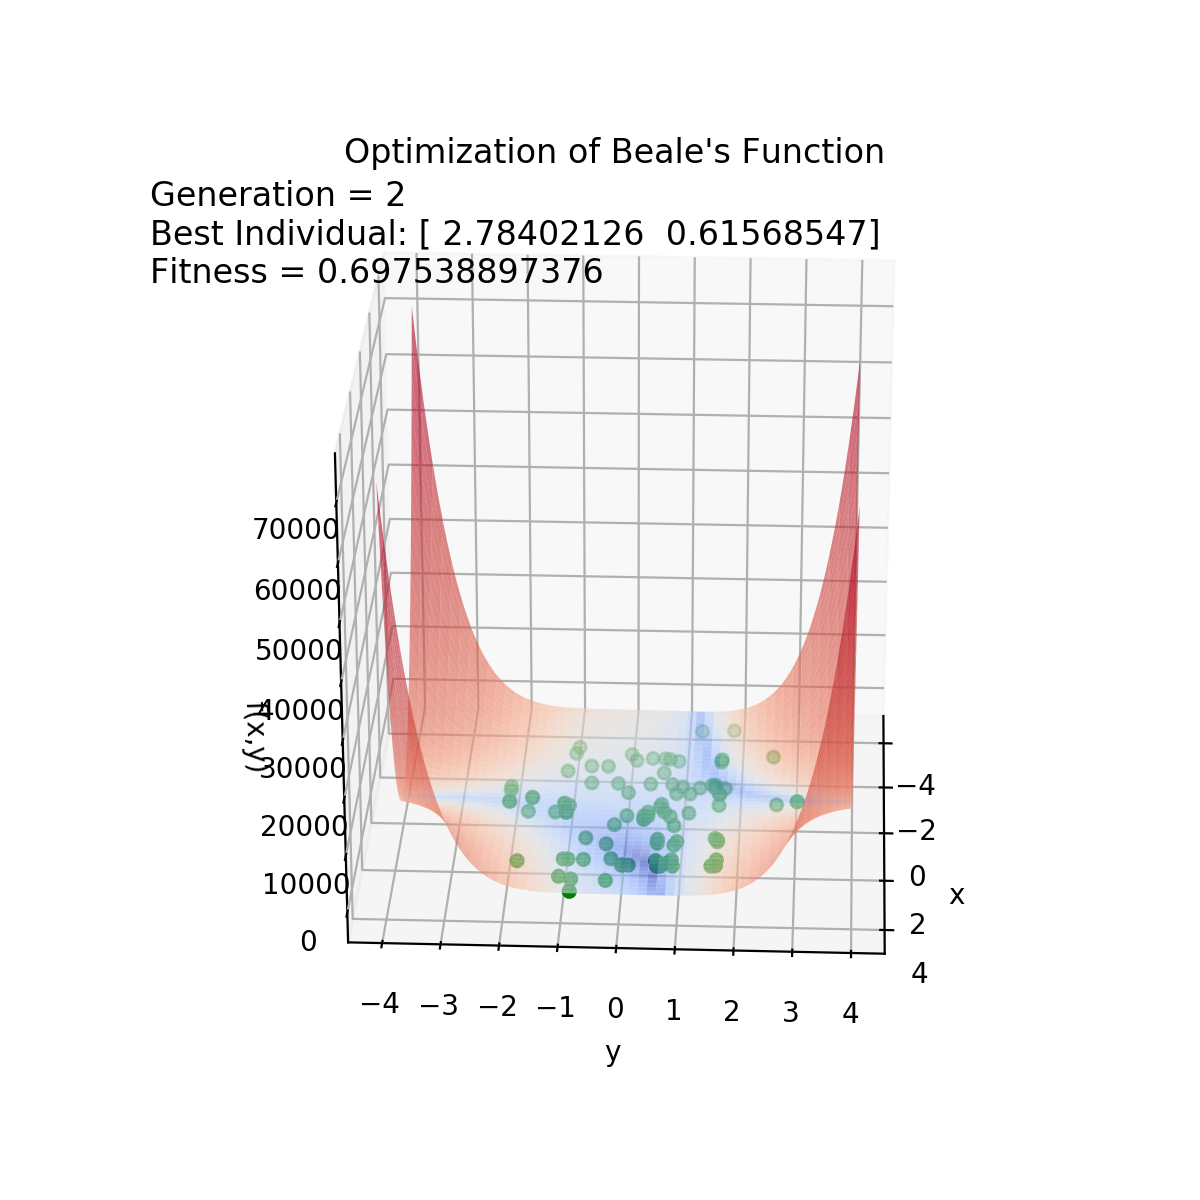

In [17]:
# Create a movie of all generations. 

fig1 = plt.figure(figsize=(6, 6))
ax = fig1.gca(projection='3d')

if opt_func == 'rastrigin':
    func_name = 'Rastrigin'
    X = np.arange(-1.5, 1.5, 0.001)
    Y = np.arange(-1.5, 1.5, 0.001)
    X, Y = np.meshgrid(X, Y)
    Z = rastrigin(X, Y)
    # Set bounds for Rastrigin since we are constricting the surface plot bounds
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
elif opt_func == 'beale':
    func_name = 'Beale'
    X = np.arange(-4., 4., 0.01)
    Y = np.arange(-4., 4., 0.01)
    X, Y = np.meshgrid(X, Y)
    Z = beale(X, Y)
else:
    print "Function options are: rastrigin or beale"

ax.plot_surface(X,Y,Z, 
                cmap=cm.coolwarm, 
                norm=colors.LogNorm(),
                alpha=0.6)
ax.view_init(25, 2.5)

lives = []

def col_beal(dat):
    return beale(dat[:, 0], dat[:, 1])
for i in range(len(log)):
    population_data = log[i]['avg']
    best_fit = np.min(col_beal(population_data))
    best_fit_individual = population_data[np.argmin(col_beal(population_data))]
    pl = ax.scatter(population_data[:, 0], population_data[:, 1], col_beal(population_data), c='g')
    gen_tex = ax.annotate('Generation = {}\nBest Individual: {}\nFitness = {}'.format(i, best_fit_individual, best_fit), 
                          fontsize=12, xy=(0., 0.85), xycoords='axes fraction')
    lives.append([pl, gen_tex])


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('\nOptimization of {}\'s Function\n'.format(func_name) )

im_animation = animation.ArtistAnimation(fig1, lives, interval=450)
# im_animation.save('simple_beale_go.mp4', fps=3, dpi=300)

plt.show()

In [1]:
! open .